In [1]:
import time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [4]:
import torch 
import torch.nn as nn
import torch.nn.functional as F

In [5]:
# Load dataset
x, y = datasets.load_boston(return_X_y=True)

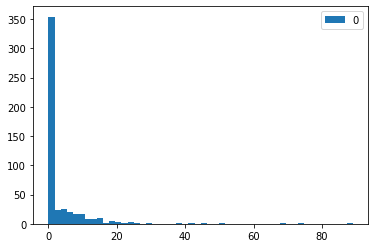

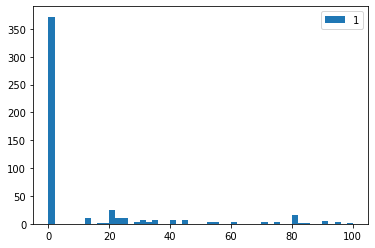

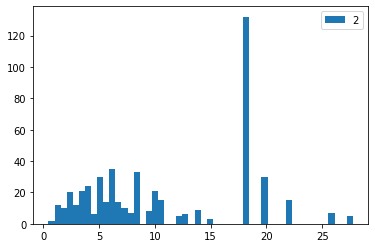

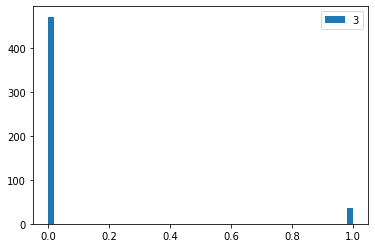

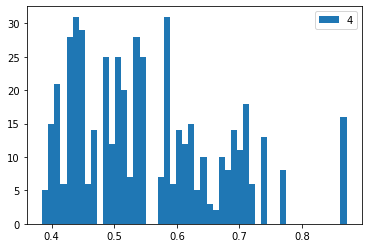

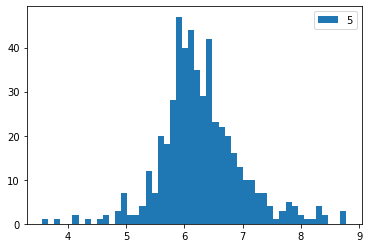

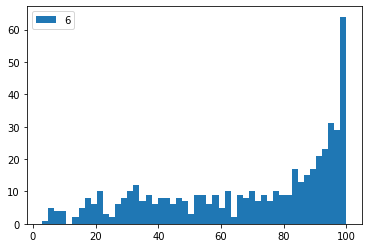

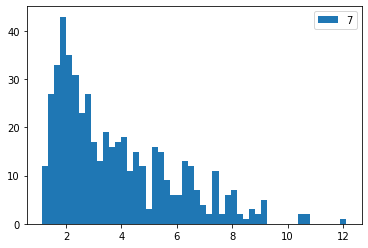

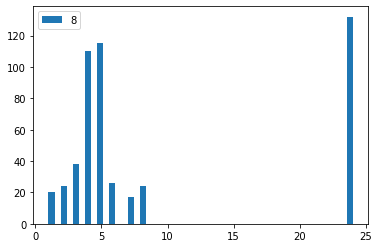

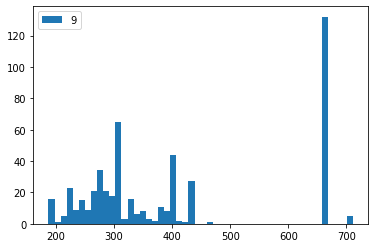

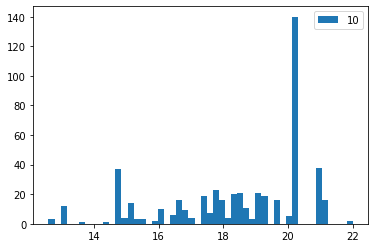

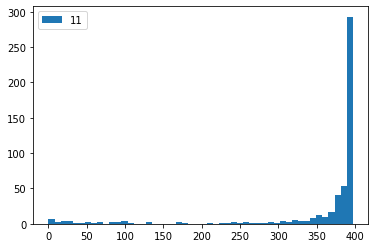

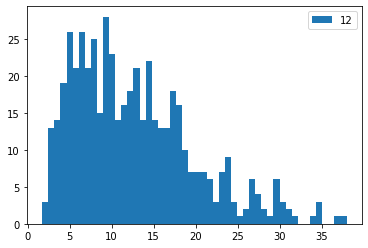

In [6]:
for i in range(x.shape[1]):
    plt.hist(x[:,i], bins=50, label=str(i))
    plt.legend()
    plt.show()

[]

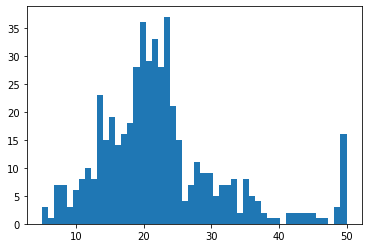

In [7]:
plt.hist(y, bins=50)
plt.plot()

In [8]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x,
                                    y, test_size=0.2,
                                    random_state=42)

In [9]:
# Convert data to tensors
x_tr = torch.FloatTensor(x_train)
x_te = torch.FloatTensor(x_test)

In [10]:
y_tr = torch.FloatTensor(y_train).reshape(-1,1)
y_te = torch.FloatTensor(y_test).reshape(-1,1)

In [11]:
y_tr.shape

torch.Size([404, 1])

In [12]:
# Model architecture
class AnnModel(nn.Module):
    def __init__(self, inp_feats=13, h1=32, h2=16, out_feats=1):
        # Define layers
        super(AnnModel, self).__init__()
        self.fc1 = nn.Linear(inp_feats, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, out_feats)
        
    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = torch.relu(self.fc2(out))
        out = self.fc3(out)
        return out
 

In [13]:
# Set the seed
seed = 42
torch.manual_seed(seed)

In [14]:
# Instantiate the model
model = AnnModel()

In [15]:
# Error criterion
criterion = nn.MSELoss()

# Define optimizer
optim = torch.optim.Adam(model.parameters(), lr=0.005)

In [16]:
# Setup training loop
num_epochs = 500
train_loss = []
test_loss = []

In [17]:
# Track model training time
t1 = time.time()

for i in range(num_epochs):
    # Remove previous gradients
    optim.zero_grad()

    # Score the input from model
    y_pred = model(x_tr)

    # Calculate loss
    loss = criterion(y_pred, y_tr)

    # Calculate gradient
    loss.backward()

    # Apply gradient descent step
    optim.step()

    train_loss.append(loss.item())

    with torch.no_grad():
        y_eval = model(x_te)
        loss_eval = criterion(y_eval, y_te)
        test_loss.append(loss_eval.item())

    if (i)%50 == 0:
        print("Epoch: ",i+1, " Train Loss: ", 
            loss.item(), " Test Loss: ", loss_eval.item())

t2 = time.time()
print("Time Taken in Training: ", t2-t1)

Epoch:  1  Train Loss:  1142.525390625  Test Loss:  683.4508666992188
Epoch:  51  Train Loss:  64.17990112304688  Test Loss:  48.25245666503906
Epoch:  101  Train Loss:  54.37565231323242  Test Loss:  37.43222427368164
Epoch:  151  Train Loss:  32.912879943847656  Test Loss:  26.19422721862793
Epoch:  201  Train Loss:  27.57396125793457  Test Loss:  24.44536590576172
Epoch:  251  Train Loss:  25.19964027404785  Test Loss:  23.905195236206055
Epoch:  301  Train Loss:  23.14191436767578  Test Loss:  23.45783805847168
Epoch:  351  Train Loss:  23.634471893310547  Test Loss:  25.260635375976562
Epoch:  401  Train Loss:  20.297826766967773  Test Loss:  23.282703399658203
Epoch:  451  Train Loss:  19.349380493164062  Test Loss:  23.130037307739258
Time Taken in Training:  0.5687680244445801


In [18]:
# Final evaluation
with torch.no_grad():
    y_train_eval = model(x_tr)
    y_test_eval = model(x_te)

In [19]:
# Convert torch tensors to numpy vectors
y_train_pred = y_train_eval.numpy()
y_test_pred = y_test_eval.numpy()

y_test_actual = y_te.reshape(-1,1).numpy()
y_train_actual = y_tr.reshape(-1,1).numpy()

In [20]:
# RMSE function
def rmse(actuals, preds):
    assert actuals.shape[0] == preds.shape[0]
    err = np.sqrt(np.mean((actuals - preds)**2))
    return err

In [21]:
# RMSE Report
train_report = rmse(y_train_actual, y_train_pred)
test_report = rmse(y_test_actual, y_test_pred)

print("RMSE Report:")
print("Train: ", train_report)
print("Test: ", test_report)

RMSE Report:
Train:  4.280474
Test:  4.6877275


In [22]:
# MAPE Report
def mape(actuals, preds):
    assert actuals.shape[0] == preds.shape[0]
    err = np.mean(np.abs(actuals - preds)/actuals)
    return err

In [23]:
# MAPE
train_acc = mape(y_train_actual, y_train_pred)
test_acc = mape(y_test_actual, y_test_pred)

print("MAPE:")
print("Train: ", train_acc)
print("Test: ", test_acc)

MAPE:
Train:  0.14388733
Test:  0.17385224


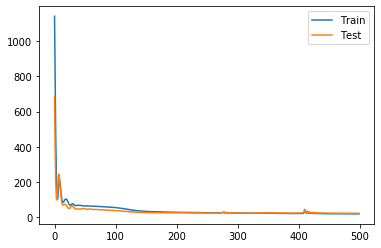

In [24]:
# Plot training curve
plt.plot(train_loss, label="Train")
plt.plot(test_loss, label="Test")
plt.legend()
plt.show()